<a href="https://colab.research.google.com/github/vieweghn/EENG-310-Signals-and-Systems/blob/main/EENG_310_HW09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
pi = np.pi

A. The fourier series of the periodic waveform (a) $f_1(t)$ below is given by:

$$ f_1(t) = 10 - \frac{20}{\pi} \sum_{n=1}^{\infty} \frac{1}{n} \sin\left(\frac{n\pi t}{2}\right). $$

Determine the Fourier series of the waveform (b) below.

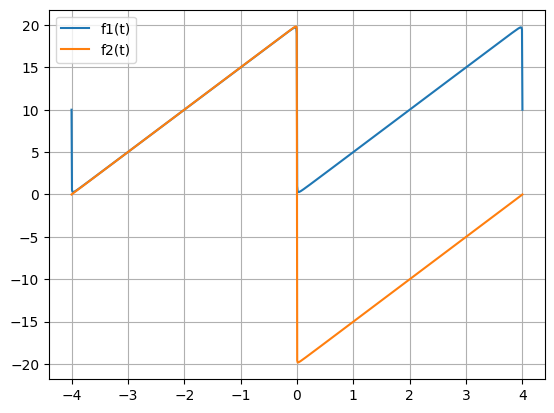

In [15]:
t = np.linspace(-4, 4, 1000)
f1 = lambda t: 10 - 20 / np.pi * sum(1 / n * np.sin(n * np.pi * t / 2) for n in range(1, 1000))
f2 = lambda t: -40 / np.pi * sum(1 / n * np.sin(n * np.pi * t / 4) for n in range(1, 10000))
plt.plot(t, f1(t), label='f1(t)')
plt.plot(t, f2(t), label='f2(t)')
plt.legend()
plt.grid()
plt.show()

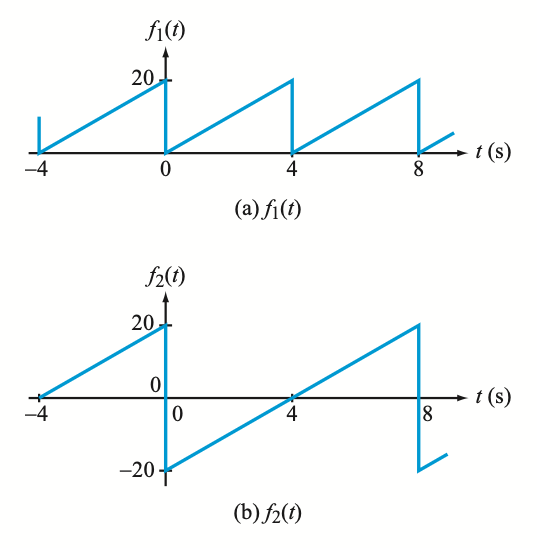

In [16]:
i_s = 20e-3
T = 5e-3
f = 1 / T
omega = 2 * pi * f
R1 = 500
R2 = 2e3
C = .33e-6
N = 5

1.) $i_{s}(t) = 10 - \frac{20}{\pi} \sum_{n=1}^{∞} \frac{1}{n}sin(\frac{n \pi t}{2})$

$v_{out}(t) = \frac{R_1}{\sqrt{(C \omega(R_2 + R_1))^2 + 1}}(10 - \frac{20}{\pi} \sum_{n=1}^{∞} \frac{1}{n}sin(\frac{n \pi t}{2} - e^{-j \tan^{-1}(C \omega (R_2 + R_1)}))$

In [24]:
H_mag = R1 / (np.sqrt((C*omega*(R2 + R1))**2 + 1))
H_phase = np.exp(-1j * np.atan(C*(R2 + R1)*omega))

def v_out(H_mag, H_phase, n):
    return H_mag * (10 - 20 / np.pi * 1 / n * np.sin(n * np.pi * t / 2 - H_phase))

Vout_terms = [H_mag * (10 - 20 / pi)]

# 2.)
for i in range(1, N + 1):
  Vout_terms.append(v_out(H_mag, H_phase, i))
  print(f"Vout_{i} = {Vout_terms[i]}")

Vout_1 = [5267.3817468 -1330.67496074j 5267.3647843 -1330.6836699j
 5267.34782169-1330.69237898j 5267.33085897-1330.70108797j
 5267.31389613-1330.70979689j 5267.29693319-1330.71850572j
 5267.27997013-1330.72721446j 5267.26300697-1330.73592313j
 5267.24604369-1330.74463171j 5267.22908031-1330.75334021j
 5267.21211681-1330.76204863j 5267.1951532 -1330.77075697j
 5267.17818948-1330.77946522j 5267.16122565-1330.78817339j
 5267.1442617 -1330.79688148j 5267.12729765-1330.80558949j
 5267.11033348-1330.81429742j 5267.09336921-1330.82300526j
 5267.07640482-1330.83171302j 5267.05944033-1330.8404207j
 5267.04247572-1330.84912829j 5267.025511  -1330.85783581j
 5267.00854617-1330.86654324j 5266.99158123-1330.87525059j
 5266.97461617-1330.88395786j 5266.95765101-1330.89266504j
 5266.94068573-1330.90137214j 5266.92372035-1330.91007916j
 5266.90675485-1330.9187861j  5266.88978925-1330.92749296j
 5266.87282353-1330.93619973j 5266.8558577 -1330.94490642j
 5266.83889176-1330.95361303j 5266.82192571-1330.

B. The current source $i_s(t)$ in the circuit below generates a sawtooth wave (see more below) with a peak amplitude of $20\mathrm{~mA}$ and a period of $T=\mathrm{~5ms}$.

1. Derive the Fourier series representation of $v_{\mathrm out}(t)$
2. Calculate the first five terms of $v_{\mathrm out}(t)$ using $R_1=500~\mathrm{\Omega}$, $R_2=2~\mathrm{k\Omega}$, and $C=0.33\mathrm{~\mu F}$.
3. Plot $v_\mathrm{out}(t)$, and $i_s(t)$ using $n_\mathrm{max}=100$.

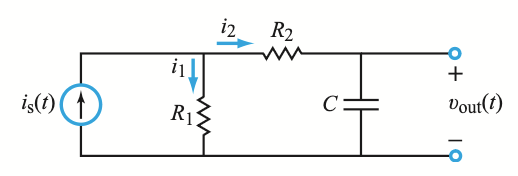

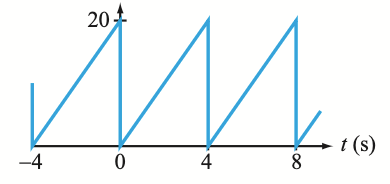

Here's what I got for the first 5 Fourier terms:

```
Term: n=0:   5.000 (DC)
Term: n=1:  -2.210 sin( 1260t + -46.0 deg)
Term: n=2:  -0.691 sin( 2510t + -64.3 deg)
Term: n=3:  -0.325 sin( 3770t + -72.2 deg)
Term: n=4:  -0.187 sin( 5030t + -76.4 deg)
```

The output should look like this when you're done.


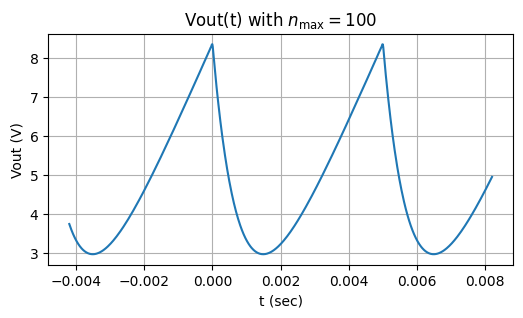

C. Voltage source $v_s(t)$ in the circuit below has the waveform displayed below.

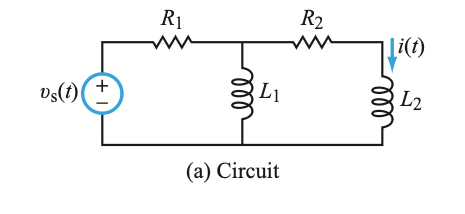

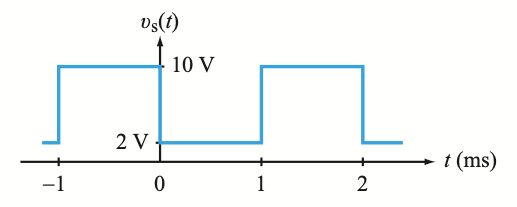

1. Derive the Fourier series representation of $i(t)$.
2. Calculate the first five terms of $i(t)$ using:

$$ R_1 = R_2 = 10\mathrm{~\Omega} \text{ and } L_1=L_2=10\mathrm{~mH}$$
3. Plot $i(t)$ and $v_s(t)$ using $n_\mathrm{max}=100$.

Here's what I got for the first five Fourier terms:

```
Term: n=1:  -0.124 sin( 3140t + -43.3 deg)
Term: n=3:  -0.017 sin( 9420t + -72.2 deg)
Term: n=5:  -0.006 sin(15700t + -79.1 deg)

n=0,2,4,6... are all zero

```

The correct output looks like this:

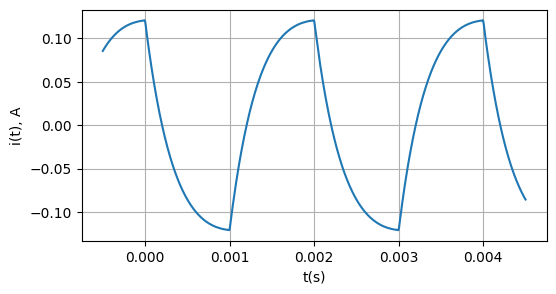